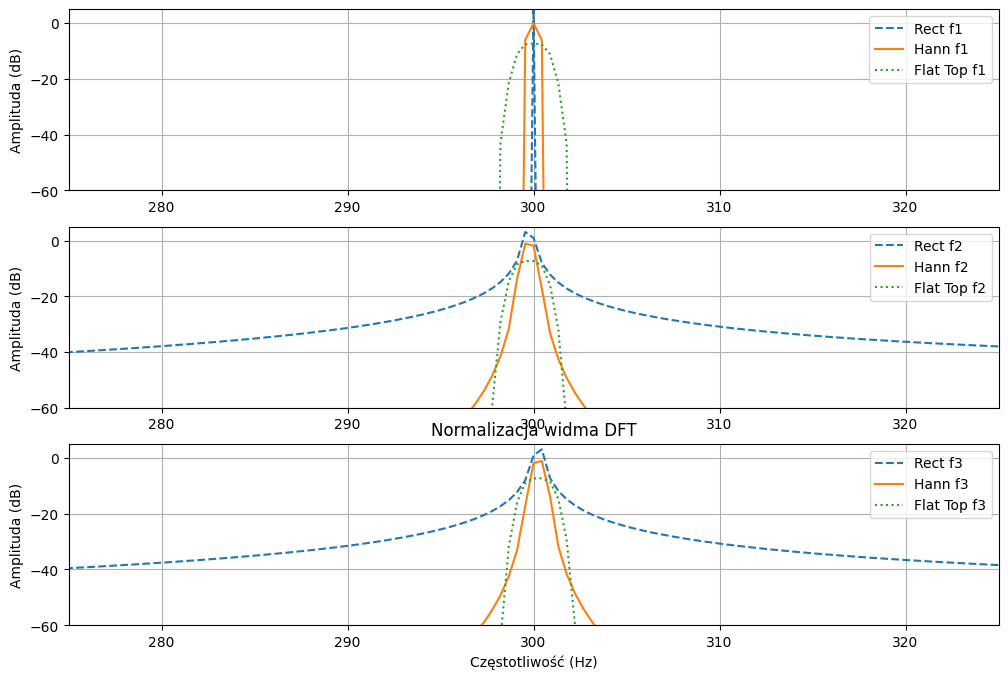

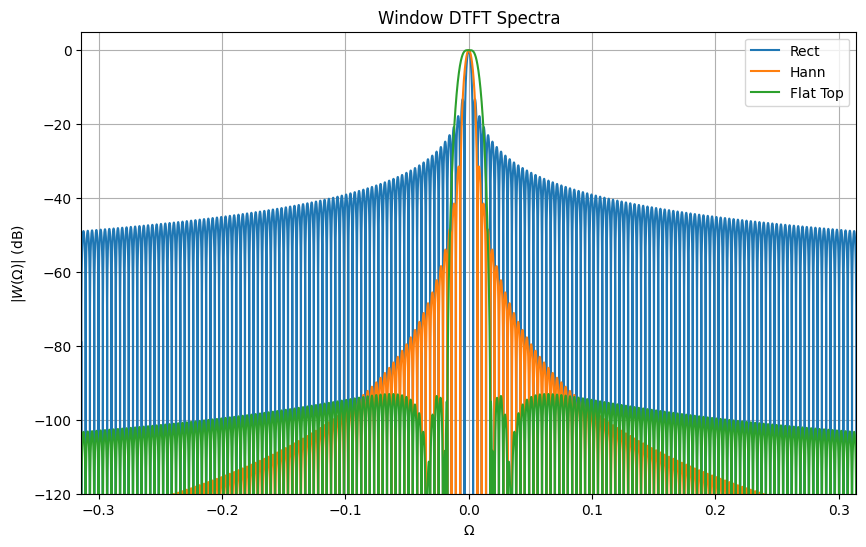

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from scipy.signal.windows import hann, flattop

# Parametry sygnału
f1, f2, f3 = 500, 500.25, 499.75
fs = 800 
N = 1800 
A = 2  

# Generowanie sygnałów
k = np.arange(N)
x1 = A * np.sin(2 * np.pi * f1 / fs * k)
x2 = A * np.sin(2 * np.pi * f2 / fs * k)
x3 = A * np.sin(2 * np.pi * f3 / fs * k)

# Okna
w_rect = np.ones(N)
w_hann = hann(N, sym=False)
w_flattop = flattop(N, sym=False)

# Funkcja do obliczania poziomu DFT w dB
def fft2db(X):
    N = X.size
    Xtmp = 2/N * X 
    Xtmp[0] *= 1/2 
    if N % 2 == 0:
        Xtmp[N//2] *= 1/2 
    return 20 * np.log10(np.abs(Xtmp))

# Obliczanie DFT
X1_rect, X2_rect, X3_rect = fft(x1 * w_rect), fft(x2 * w_rect), fft(x3 * w_rect)
X1_hann, X2_hann, X3_hann = fft(x1 * w_hann), fft(x2 * w_hann), fft(x3 * w_hann)
X1_flattop, X2_flattop, X3_flattop = fft(x1 * w_flattop), fft(x2 * w_flattop), fft(x3 * w_flattop)

# Wektor częstotliwości
df = fs / N
f = np.arange(N) * df

# Wykresy DFT
plt.figure(figsize=(12, 8))
for i, (X_rect, X_hann, X_flattop, label) in enumerate(
        [(X1_rect, X1_hann, X1_flattop, 'f1'), (X2_rect, X2_hann, X2_flattop, 'f2'), (X3_rect, X3_hann, X3_flattop, 'f3')]):
    plt.subplot(3, 1, i + 1)
    plt.plot(f[:N//2], fft2db(X_rect)[:N//2], label=f'Rect {label}', linestyle='--')
    plt.plot(f[:N//2], fft2db(X_hann)[:N//2], label=f'Hann {label}')
    plt.plot(f[:N//2], fft2db(X_flattop)[:N//2], label=f'Flat Top {label}', linestyle='dotted')
    plt.xlim(275, 325)
    plt.ylim(-60, 5)
    plt.legend()
    plt.grid()
    plt.ylabel('Amplituda (dB)')
plt.xlabel('Częstotliwość (Hz)')
plt.title('Normalizacja widma DFT')
plt.show()

# Funkcja DTFT
def winDTFTdB(w):
    N = w.size
    Nz = 100 * N 
    W = np.zeros(Nz)
    W[:N] = w
    W = np.abs(fftshift(fft(W))) 
    W /= np.max(W) 
    return np.linspace(-np.pi, np.pi, Nz), 20 * np.log10(W + 1e-12)

# Wykresy DTFT
plt.figure(figsize=(10, 6))
for w, label in zip([w_rect, w_hann, w_flattop], ['Rect', 'Hann', 'Flat Top']):
    Omega, W = winDTFTdB(w)
    plt.plot(Omega, W, label=label)
plt.xlim(-np.pi / 10, np.pi / 10)
plt.ylim(-120, 5)
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|W(\Omega)|$ (dB)')
plt.title('Window DTFT Spectra')
plt.legend()
plt.grid()
plt.show()
